# Product Amount Forecast by Time

## Data

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

## Import Libraries

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Indest Data

In [31]:
df = pd.read_csv('Frozen_Dessert_Production.csv',
                 index_col='DATE',   # DATE'i indeks yaptı.
                 parse_dates=True    # type ını datetime a çevirdi
                )
df

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


## Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Change the column name as "Production"
2. Plot your data and see its seasonalty

In [32]:
df.head()

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IPN31152N  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


<AxesSubplot:xlabel='DATE'>

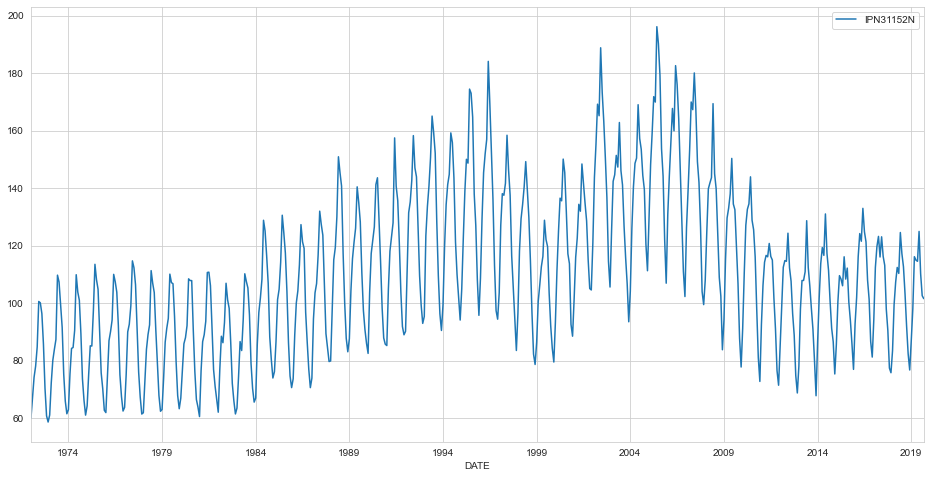

In [34]:
df.plot(figsize=(16,8))

## Preprocessing of Data

### Train Test Split

In [35]:
len(df)

573

In [36]:
test_size = 18

In [37]:
test_ind = len(df)- test_size
test_ind

555

In [38]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [39]:
train.shape

(555, 1)

In [40]:
train.head()

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764


### Scaling

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [42]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [43]:
length = 12
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, batch_size = 1)

In [44]:
generator[0]
X, y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.00947104 0.06108982 0.11326273 0.14145625 0.18982663 0.30495972
 0.30154406 0.27416065 0.19736841 0.08532665 0.01561588 0.        ]
Predict this y: 
 [[0.01774221]]


## Modelling & Model Performance

### Import related libraries

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

### Creating Model

### with "tanh" activation function

In [46]:
n_features = 1

In [47]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh', input_shape = (length, n_features)))  # tanh (tanjant hiperbolik) seçmedim. bu defa relu seçtim.
model.add(Dense(1))  # 2 değeri karşılaştıracağım için çıkış layer ında 1 nöron olmalı.
model.compile(optimizer = 'adam', loss = 'mse')

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


#### Evaluate on Test Data

In [49]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5)
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = 1)

In [50]:
model.fit_generator(generator, epochs = 20,
                    validation_data = validation_generator,
                    callbacks=[early_stop])

Epoch 1/20
543/543 [==============================] - 6s 8ms/step - loss: 0.0227 - val_loss: 0.0026
Epoch 2/20
543/543 [==============================] - 5s 8ms/step - loss: 0.0039 - val_loss: 0.0055
Epoch 3/20
543/543 [==============================] - 4s 7ms/step - loss: 0.0038 - val_loss: 0.0026
Epoch 4/20
543/543 [==============================] - 5s 9ms/step - loss: 0.0037 - val_loss: 0.0068
Epoch 5/20
543/543 [==============================] - 4s 7ms/step - loss: 0.0035 - val_loss: 0.0019
Epoch 6/20
543/543 [==============================] - 4s 7ms/step - loss: 0.0032 - val_loss: 0.0040
Epoch 7/20
543/543 [==============================] - 4s 8ms/step - loss: 0.0035 - val_loss: 0.0025
Epoch 8/20
543/543 [==============================] - 4s 7ms/step - loss: 0.0032 - val_loss: 0.0023
Epoch 9/20
543/543 [==============================] - 4s 7ms/step - loss: 0.0032 - val_loss: 0.0023
Epoch 10/20
543/543 [==============================] - 4s 8ms/step - loss: 0.0031 - val_loss: 0.0019

<AxesSubplot:>

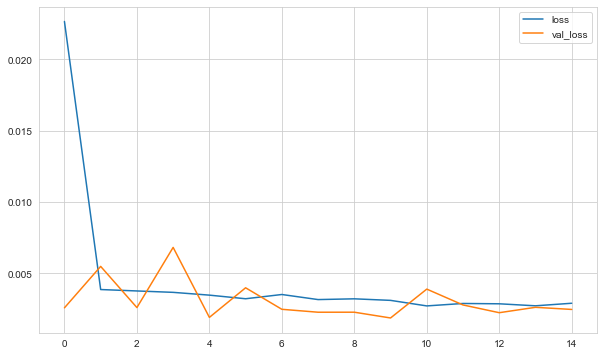

In [51]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [53]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [54]:
y_pred = model.predict(validation_generator)
y_pred

array([[0.42672503],
       [0.44063684],
       [0.4387503 ],
       [0.44911003],
       [0.3346736 ],
       [0.2357311 ]], dtype=float32)

In [55]:
test_scaled[-6:]

array([[0.40948951],
       [0.40651527],
       [0.48213817],
       [0.37525952],
       [0.3195946 ],
       [0.31216335]])

In [56]:
eval_metrics(test_scaled[-6:], y_pred)

r2_score: 0.2630051342909081 
 mae: 0.04335112419575989 
 mse: 0.0024778361713150374 
 rmse: 0.049777868288176395


In [57]:
test_predictions = []

first_eval_batch = train_scaled[-length:]

current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)
    
# train datamızın sonundan 12lik bir parçayı aldık. bu bizim ilk eval_batch imiz olacak. bundan ileriye forecast yapacağız
# sonra bunu reshape yaptık (1,12,1) oldu  ( (1, length, n_features) )
# bundan for döngüsü içinde current_batch i hep bir ilerletecek şekilde predict ler alıp alıp test_prediction a kaydettim. 

In [58]:
eval_metrics(test_scaled, test_predictions)

r2_score: 0.710255839834923 
 mae: 0.04486248368751649 
 mse: 0.002786302190583606 
 rmse: 0.052785435402046325


#### Inverse Transformations and Comparing

In [59]:
true_predictions = scaler.inverse_transform(test_predictions)
test['Predictions'] = true_predictions

In [61]:
test

,IPN31152N,Predictions
DATE,,
2018-04-01,112.431,112.088
2018-05-01,110.354,116.848
2018-06-01,124.584,119.890
2018-07-01,117.222,117.299
2018-08-01,112.678,108.701
2018-09-01,103.312,95.478
2018-10-01,92.132,82.023
2018-11-01,82.435,72.848
2018-12-01,76.761,72.661


#### Calculation R2 Score and Error Metrics

In [62]:
eval_metrics(test.IPN31152N, test.Predictions)

r2_score: 0.7102558398349228 
 mae: 6.169215095556779 
 mse: 52.68917696918632 
 rmse: 7.258731085333464


### with "relu" activation function

In [63]:
model = Sequential()
model.add(LSTM(100, activation = 'relu', input_shape = (length, n_features))) 
model.add(Dense(1)) 
model.compile(optimizer = 'adam', loss = 'mse')

In [64]:
model.fit_generator(generator, epochs = 20,
                    validation_data = validation_generator,
                    callbacks = [early_stop])

Epoch 1/20
543/543 [==============================] - 5s 7ms/step - loss: 0.0251 - val_loss: 0.0022
Epoch 2/20
543/543 [==============================] - 3s 6ms/step - loss: 0.0100 - val_loss: 0.0026
Epoch 3/20
543/543 [==============================] - 4s 7ms/step - loss: 0.0044 - val_loss: 0.0017
Epoch 4/20
543/543 [==============================] - 4s 8ms/step - loss: 0.0048 - val_loss: 0.0040
Epoch 5/20
543/543 [==============================] - 3s 6ms/step - loss: 0.0043 - val_loss: 0.0016
Epoch 6/20
543/543 [==============================] - 3s 6ms/step - loss: 0.0036 - val_loss: 0.0037
Epoch 7/20
543/543 [==============================] - 4s 7ms/step - loss: 0.0033 - val_loss: 0.0017
Epoch 8/20
543/543 [==============================] - 3s 6ms/step - loss: 0.0033 - val_loss: 0.0020
Epoch 9/20
543/543 [==============================] - 4s 7ms/step - loss: 0.0031 - val_loss: 0.0022
Epoch 10/20
543/543 [==============================] - 4s 8ms/step - loss: 0.0030 - val_loss: 0.0037

<AxesSubplot:>

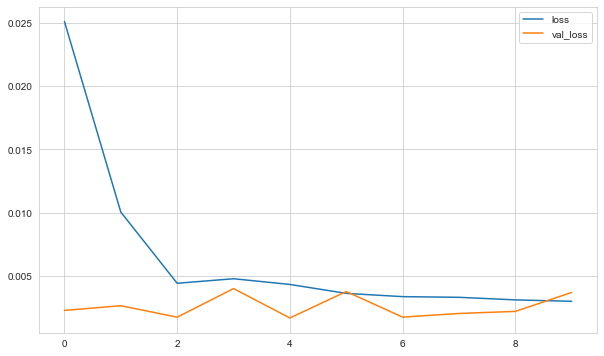

In [65]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

#### Evaluate on Test Data

In [66]:
y_pred = model.predict(validation_generator)
y_pred

array([[0.4442024 ],
       [0.48238724],
       [0.4836881 ],
       [0.47303763],
       [0.37870067],
       [0.26764342]], dtype=float32)

In [70]:
eval_metrics(test_scaled[-6:], y_pred)

r2_score: -0.09059718220520252 
 mae: 0.05225648115375834 
 mse: 0.0036666756746022884 
 rmse: 0.06055308146248454


In [71]:
test_predictions = []

first_eval_batch = train_scaled[-length:]

current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)
    

In [72]:
eval_metrics(test_scaled, test_predictions)

r2_score: 0.15784261791667975 
 mae: 0.07073942658626153 
 mse: 0.008098540992777998 
 rmse: 0.08999189403928555


#### Inverse Transformations and Comparing

In [73]:
true_predictions = scaler.inverse_transform(test_predictions)

#### Calculation R2 Score and Error Metrics

<AxesSubplot:xlabel='DATE'>

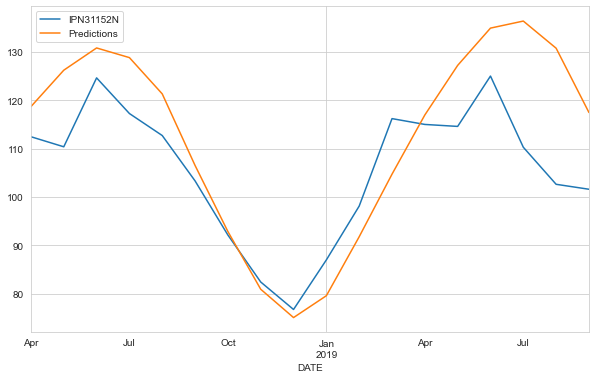

In [74]:
test['Predictions'] = true_predictions
test.plot()

## Retrain and Forecasting

Select activation function providing a better score, create your final model with full data, forecast for the next 12 months, and plot this forecast.

In [75]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [76]:
length = 12 
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = 1)

In [77]:
model = Sequential()
model.add(LSTM(100, activation = 'relu', input_shape = (length, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

model.fit_generator(generator, epochs=15)

Epoch 1/15
561/561 [==============================] - 5s 7ms/step - loss: 0.0235
Epoch 2/15
561/561 [==============================] - 4s 7ms/step - loss: 0.0102
Epoch 3/15
561/561 [==============================] - 4s 6ms/step - loss: 0.0059
Epoch 4/15
561/561 [==============================] - 3s 6ms/step - loss: 0.0054
Epoch 5/15
561/561 [==============================] - 4s 6ms/step - loss: 0.0044
Epoch 6/15
561/561 [==============================] - 3s 6ms/step - loss: 0.0046
Epoch 7/15
561/561 [==============================] - 3s 6ms/step - loss: 0.0039
Epoch 8/15
561/561 [==============================] - 3s 6ms/step - loss: 0.0037
Epoch 9/15
561/561 [==============================] - 3s 6ms/step - loss: 0.0037
Epoch 10/15
561/561 [==============================] - 3s 6ms/step - loss: 0.0037
Epoch 11/15
561/561 [==============================] - 3s 6ms/step - loss: 0.0031
Epoch 12/15
561/561 [==============================] - 6s 11ms/step - loss: 0.0032: 0s - loss: - ETA: 0s - 

In [78]:
scaled_full_data.shape

(573, 1)

In [79]:
scaled_full_data[-length:].shape

(12, 1)

In [80]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 12

first_eval_batch = scaled_full_data[-length:] 
# tüm datamın son 12 ye 1 lik kısmını aldım. artık bunu ileriye doğru predict te (forecast) kullanıcam
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis = 1)
  

In [81]:
forecast = scaler.inverse_transform(forecast)
forecast

array([[ 94.65762643],
       [ 90.69379647],
       [ 91.63314234],
       [102.24848122],
       [115.03246597],
       [125.35374839],
       [131.28215473],
       [135.64245396],
       [135.86264385],
       [129.83736347],
       [122.00140152],
       [113.80799984]])

In [86]:
forecast_index = pd.date_range(start = '2018-10-01', periods = periods, freq = 'MS')
forecast_index

DatetimeIndex(['2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01',
               '2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01',
               '2019-06-01', '2019-07-01', '2019-08-01', '2019-09-01'],
              dtype='datetime64[ns]', freq='MS')

In [87]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])
forecast_df

,Forecast
2018-10-01,94.658
2018-11-01,90.694
2018-12-01,91.633
2019-01-01,102.248
2019-02-01,115.032
2019-03-01,125.354
2019-04-01,131.282
2019-05-01,135.642
2019-06-01,135.863
2019-07-01,129.837


<AxesSubplot:>

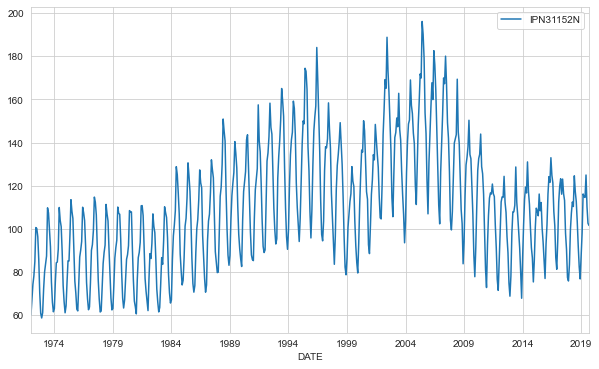

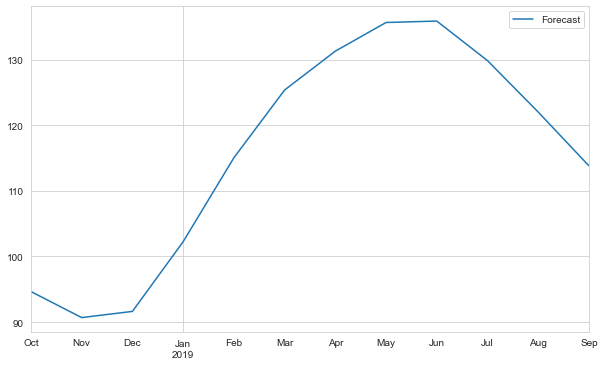

In [88]:
df.plot()
forecast_df.plot()

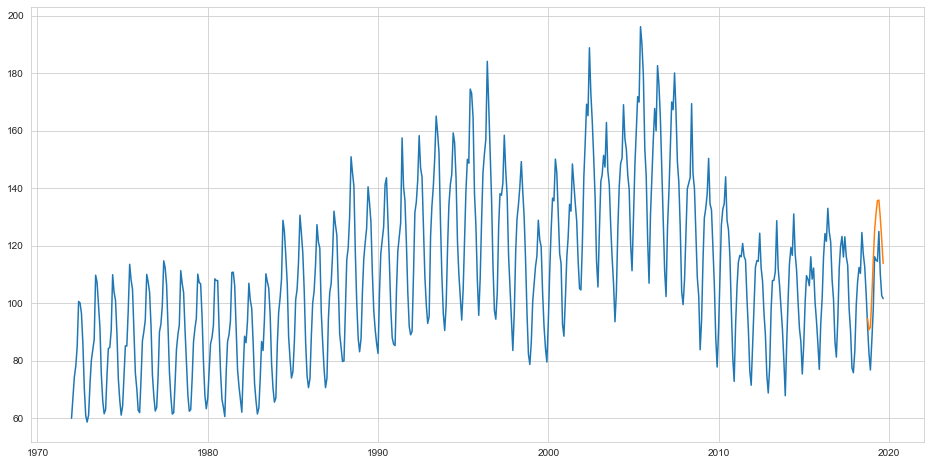

In [90]:
plt.figure(figsize = (16, 8))
plt.plot(df.index, df['IPN31152N'])
plt.plot(forecast_df.index, forecast_df['Forecast'])